In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [6]:
file_path = 'dataset/n_decepal.csv'
df = pd.read_csv(file_path, quotechar='"', delimiter=";")

In [7]:
df.head()

,EMPRESA,ARTICULO,TIPO_MATERIAL,CODIGO_FAMILIA,PESO_NETO,MULTIPRESENTACION,STOCK_ACTUAL,TOTAL_CANTIDAD_MOVS,PMP,TOTAL_IMPORTE_MOVS,TOTAL_MOVS
0,1,10101,A,11010,1,1,35,718,"8,044","5775,592",544
1,1,10102,A,11010,1,1,68,1630,"1,33","2167,9",932
2,1,10103,A,11010,1,1,0,956,"16,16","15448,96",492
3,1,10104,A,11010,1,1,134,1740,"6,335","11022,9",710
4,1,10105,P,11010,1,1,33,170,"31,568","5366,56",180


In [8]:
df['STOCK_ACTUAL'] = df['STOCK_ACTUAL'].str.replace(',', '.').astype(float)
df['TOTAL_CANTIDAD_MOVS'] = df['TOTAL_CANTIDAD_MOVS'].str.replace(',', '.').astype(float)
df['PMP'] = df['PMP'].str.replace(',', '.').astype(float)
df['TOTAL_IMPORTE_MOVS'] = df['TOTAL_IMPORTE_MOVS'].str.replace(',', '.').astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8795 entries, 0 to 8794
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EMPRESA              8795 non-null   int64  
 1   ARTICULO             8795 non-null   int64  
 2   TIPO_MATERIAL        8795 non-null   object 
 3   CODIGO_FAMILIA       8795 non-null   int64  
 4   PESO_NETO            8795 non-null   int64  
 5   MULTIPRESENTACION    8795 non-null   int64  
 6   STOCK_ACTUAL         8795 non-null   float64
 7   TOTAL_CANTIDAD_MOVS  8795 non-null   float64
 8   PMP                  8795 non-null   float64
 9   TOTAL_IMPORTE_MOVS   8795 non-null   float64
 10  TOTAL_MOVS           8795 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 755.9+ KB


In [10]:
label_encoder = LabelEncoder()
df['ARTICULO'] = label_encoder.fit_transform(df['ARTICULO'])
df['TIPO_MATERIAL'] = label_encoder.fit_transform(df['TIPO_MATERIAL'])
df['CODIGO_FAMILIA'] = label_encoder.fit_transform(df['CODIGO_FAMILIA'])

In [11]:
df.drop(columns=['EMPRESA','PESO_NETO','MULTIPRESENTACION','ARTICULO','CODIGO_FAMILIA'], inplace=True)

In [12]:
columns_to_standardize = ['TIPO_MATERIAL','PMP','STOCK_ACTUAL','TOTAL_CANTIDAD_MOVS','TOTAL_IMPORTE_MOVS','TOTAL_MOVS']
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# IQR para detectar y eliminar outliers
columns = columns_to_standardize

filtered_df = df.copy()

for column in columns:
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]


original_count = df.shape[0]
filtered_count = filtered_df.shape[0]
reduction = ((original_count - filtered_count) / original_count) * 100

print(f"El DataFrame se ha reducido en un {reduction}%")



El DataFrame se ha reducido en un 15.838544627629336%


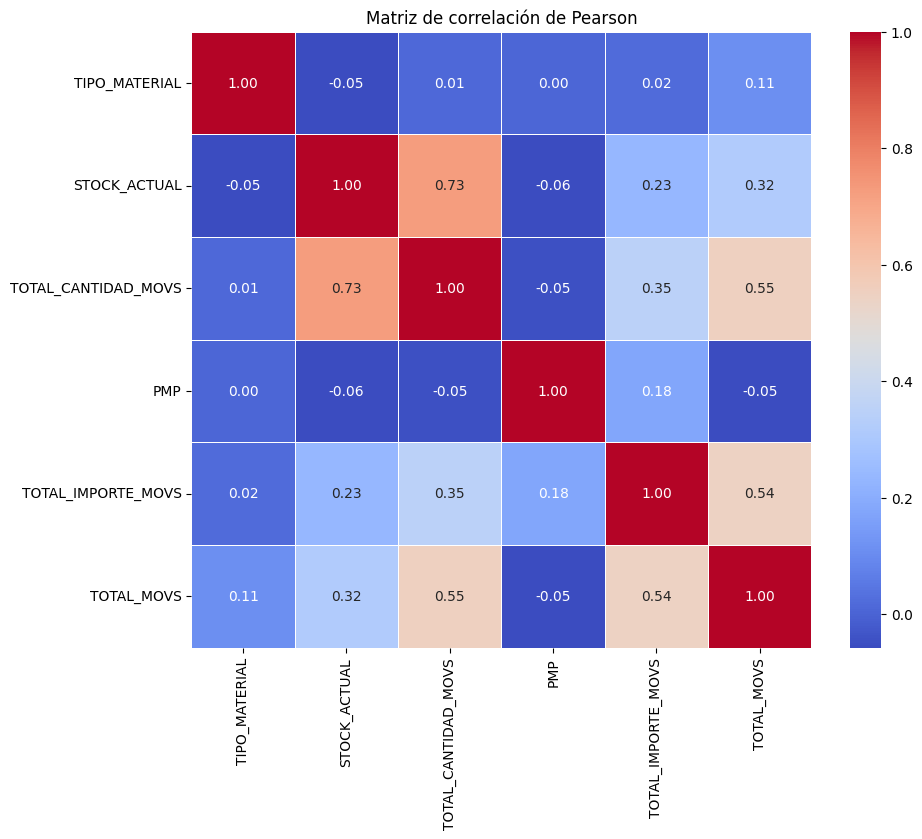

In [13]:
### PON AQUÍ TU CÓDIGO
# Calcula las correlaciones de Pearson entre todas las variables
correlation_matrix = df.corr(method='pearson')

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea un mapa de calor de la matriz de correlaciones
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añade título
plt.title('Matriz de correlación de Pearson')

# Muestra el mapa de calor
plt.show()

In [14]:
X = df.copy()

In [15]:
kmeansmodel = KMeans(n_clusters = 3, init='k-means++', random_state=0,n_init=10)
y_kmeans = kmeansmodel.fit_predict(X)

In [16]:
import plotly.express as px

clusters = pd.DataFrame(X,columns=X.columns)
clusters['label'] = kmeansmodel.labels_
polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=600)
fig4.show()

In [17]:
pie = clusters.groupby('label').size().reset_index()
pie.columns = ['label','value']
px.pie(pie,values ='value',names ='label')

In [18]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar Clustering Jerárquico
agg_model = AgglomerativeClustering(n_clusters=3)
y_agg = agg_model.fit_predict(X)

# Agregar etiquetas de cluster al dataframe
clusters_agg = pd.DataFrame(X, columns=X.columns)
clusters_agg['label'] = agg_model.labels_

# Visualización polar para Clustering Jerárquico
polar_agg = clusters_agg.groupby("label").mean().reset_index()
polar_agg = pd.melt(polar_agg, id_vars=["label"])
fig_agg = px.line_polar(polar_agg, r="value", theta="variable", color="label", line_close=True, height=800, width=600)
fig_agg.show()

# Visualización de distribución de clusters con Clustering Jerárquico
pie_agg = clusters_agg.groupby('label').size().reset_index()
pie_agg.columns = ['label', 'value']
px.pie(pie_agg, values='value', names='label').show()

Resultados del clustering con DBSCAN (número de clusters):
min_samples    5    6    7    8    9
eps                                 
0.2          NaN  NaN  4.0  2.0  3.0
0.4          NaN  NaN  5.0  4.0  3.0
0.5          NaN  NaN  NaN  5.0  4.0
0.6          NaN  NaN  NaN  4.0  5.0
0.7          NaN  NaN  4.0  4.0  4.0
0.8          3.0  NaN  NaN  3.0  3.0
0.9          NaN  3.0  3.0  NaN  3.0
1.0          NaN  3.0  3.0  3.0  3.0
Mejores parámetros para DBSCAN con objetivo de 3 clusters: eps=0.2, min_samples=9
Influencia de las features en cada cluster:
            PMP  STOCK_ACTUAL  TIPO_MATERIAL  TOTAL_CANTIDAD_MOVS  \
label                                                               
0     -0.005918      0.018958      -0.484231             0.000306   
1      0.022974     -0.076168       1.953748            -0.002096   
2      0.189157     -0.135230       1.953748             0.156286   

       TOTAL_IMPORTE_MOVS  TOTAL_MOVS  label  
label                                         
0    

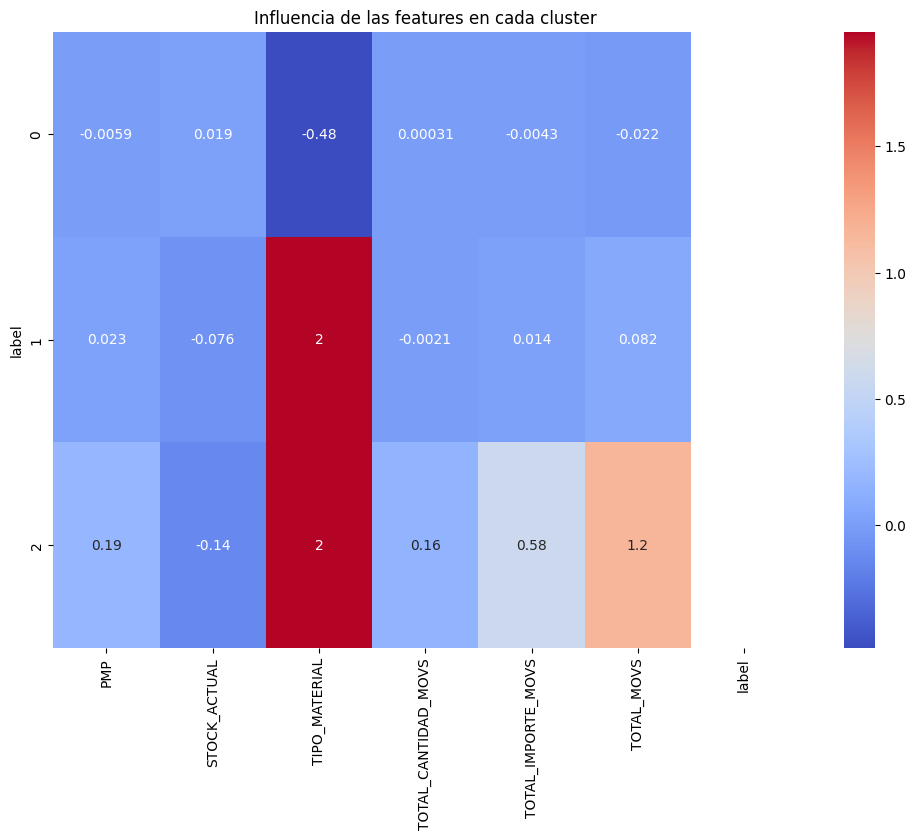

In [20]:
# Parámetros para DBSCAN
eps_values = np.linspace(0.1, 1.0, 10)
min_samples_values = range(1, 10)
results = []

# Calcular el tamaño mínimo del cluster en base al porcentaje
min_points_percentage = 0.001  # 5% del total
min_points = int(len(X) * min_points_percentage)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_model.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluir ruido
        
        # Verificar el tamaño mínimo de los clusters
        clusters = pd.Series([label for label in labels if label != -1])
        if all(clusters.value_counts() >= min_points):
            results.append((eps, min_samples, n_clusters))

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters'])
results_pivot = results_df.pivot_table(values='n_clusters', index='eps', columns='min_samples')

# Mostrar la tabla de resultados
print("Resultados del clustering con DBSCAN (número de clusters):")
print(results_pivot)

# Función para encontrar la combinación de parámetros más cercana al número objetivo de clusters
def find_best_dbscan_params(target_clusters, results_df):
    results_df['diff'] = abs(results_df['n_clusters'] - target_clusters)
    best_params = results_df.loc[results_df['diff'].idxmin()]
    return best_params['eps'], int(best_params['min_samples'])

# Especificar el número objetivo de clusters
target_clusters = 3

# Encontrar los mejores parámetros
best_eps, best_min_samples = find_best_dbscan_params(target_clusters, results_df)
print(f"Mejores parámetros para DBSCAN con objetivo de {target_clusters} clusters: eps={best_eps}, min_samples={best_min_samples}")

# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_dbscan = dbscan_model.fit_predict(X)

# Crear un DataFrame para clusters excluyendo el ruido
clusters_dbscan = pd.DataFrame(X, columns=X.columns)
clusters_dbscan['label'] = y_dbscan

# Excluir puntos de ruido
clusters_dbscan_valid = clusters_dbscan[clusters_dbscan['label'] != -1]

# Calcular las medias de las features para cada cluster
cluster_means = clusters_dbscan_valid.groupby('label').mean()

# Calcular la media global
global_mean = clusters_dbscan_valid.mean()

# Comparar las medias de cada cluster con la media global
influence = cluster_means - global_mean

# Mostrar la influencia de cada feature en cada cluster
print("Influencia de las features en cada cluster:")
print(influence)

# Visualización de la influencia de las features en cada cluster
plt.figure(figsize=(12, 8))
sns.heatmap(influence, annot=True, cmap='coolwarm')
plt.title('Influencia de las features en cada cluster')
plt.show()

In [21]:

# Visualización polar para DBSCAN excluyendo ruido y clusters pequeños
polar_dbscan = clusters_dbscan_valid.groupby("label").mean().reset_index()
polar_dbscan = pd.melt(polar_dbscan, id_vars=["label"])
fig_dbscan = px.line_polar(polar_dbscan, r="value", theta="variable", color="label", line_close=True, height=800, width=600)
fig_dbscan.show()

# Visualización de distribución de clusters con DBSCAN excluyendo ruido y clusters pequeños
pie_dbscan = clusters_dbscan_valid.groupby('label').size().reset_index()
pie_dbscan.columns = ['label', 'value']
px.pie(pie_dbscan, values='value', names='label').show()